## Experiment-1

In [1]:
import cv2
import numpy as np
from scipy.stats.kde import gaussian_kde
import matplotlib.pyplot as plt

C:\Users\CONNECT\AppData\Local\Temp\ipykernel_13336\870672267.py:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [2]:
image = cv2.imread('eight.jpg', 0)
image = image/255

In [3]:
cv2.imshow('original image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
def add_gaussian_noise(image, mean, variance):
    h, w = image.shape
    gaussian_noise = np.random.normal(mean, variance, (h, w))
    noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_image

# Add Gaussian noise to the image
mean = 0
variance = 100
g = add_gaussian_noise(image, mean, variance)

In [5]:
cv2.imshow('Gaussian noise', n)
cv2.waitKey(0)
cv2.destroyAllWindows()

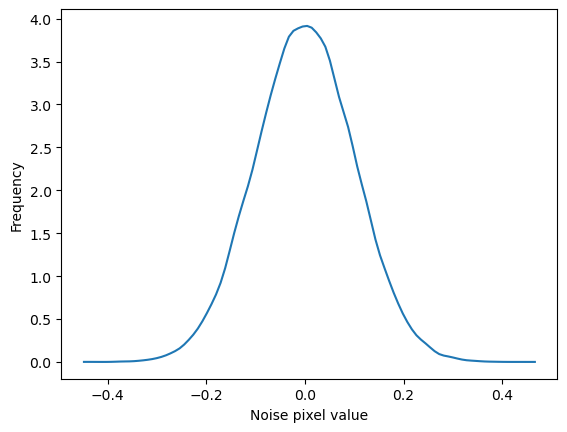

In [6]:
kde = gaussian_kde(n.reshape(int(x*y)))
dist_space = np.linspace(np.min(n), np.max(n), 100)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value'); plt.ylabel('Frequency')
plt.show()

In [71]:
cv2.imshow('original image', image)
cv2.imshow('Gaussian noise', n)
cv2.imshow('Corrupted Image', g)

cv2.waitKey(0)
cv2.destroyAllWindows()

### median filter

In [45]:
blurred_image = cv2.medianBlur(g, 3)
blurred_image = cv2.medianBlur(g, 5)

In [73]:
cv2.imshow('Original Image', g)
cv2.imshow('Median Filtered Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### averaging filter

In [9]:
kernel_size = (5, 5)  # This can be changed depending on how much blurring you want

    # Apply the averaging blur
averaged_image = cv2.blur(image, kernel_size)

    # Show the original and averaged images
cv2.imshow('Original Image', image)
cv2.imshow('Averaged Image', averaged_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Experiment-2

In [10]:
img = cv2.imread('circuit.jpg', 0)

### Laplacian

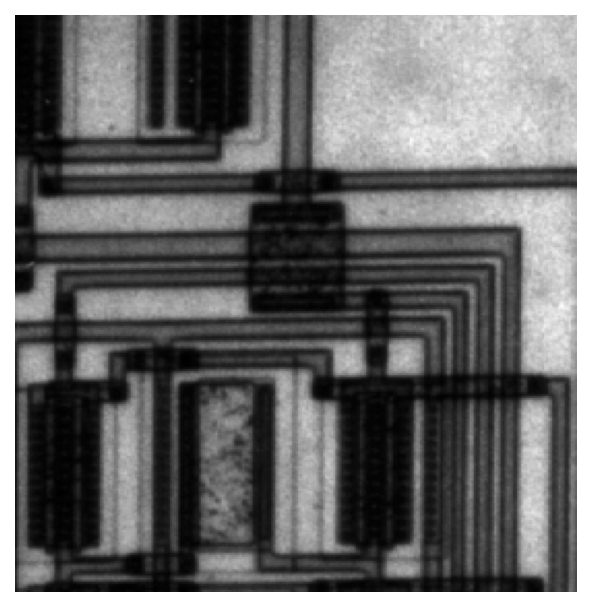

In [11]:
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

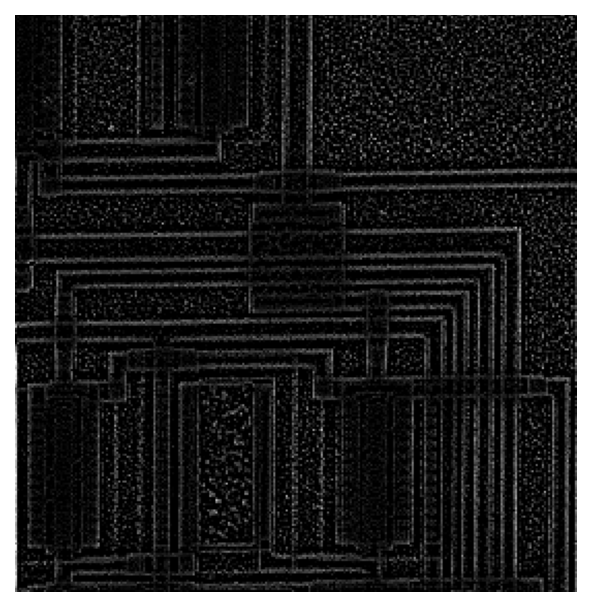

In [12]:
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

LaplacianImage = cv2.filter2D(src=img, 
                              ddepth=-1, 
                              kernel=kernel)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(LaplacianImage, cmap='gray')
plt.axis('off')
plt.show()

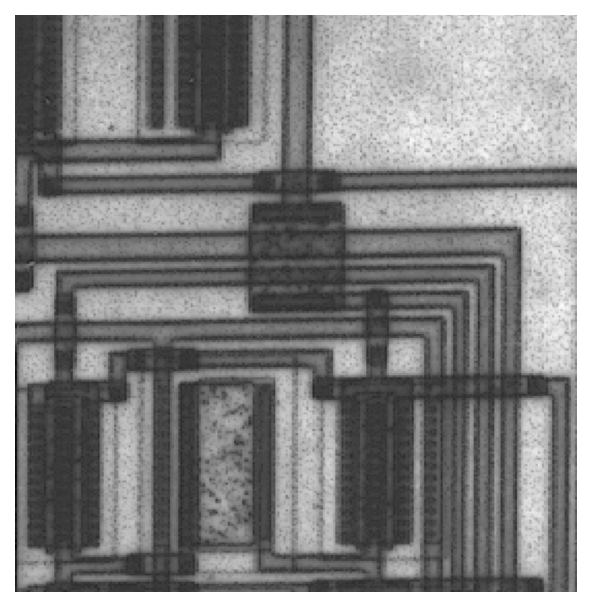

In [13]:
c = -1
g = img + c*LaplacianImage

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

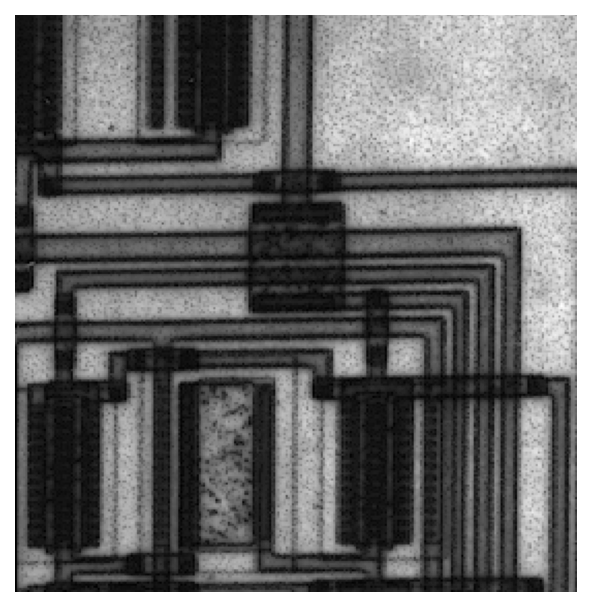

In [14]:
gClip = np.clip(g, 0, 255)
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(gClip, cmap='gray')
plt.axis('off')
plt.show()

### Sobel

In [15]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    # Apply Sobel filter in the Y direction
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

In [16]:
sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_mag = np.uint8(np.absolute(sobel_mag))

In [19]:
cv2.imshow('Original Image', img)
cv2.imshow('Sobel X', np.uint8(np.absolute(sobel_x)))
cv2.imshow('Sobel Y', np.uint8(np.absolute(sobel_y)))
cv2.imshow('Sobel Magnitude', sobel_mag)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Experiment-3

In [20]:
m = cv2.imread('cameraman.jpg', 0)

### low-pass flter

In [21]:
kernel_size = 5  # This means a 5x5 kernel
    # Create an averaging kernel
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)

In [22]:
filtered_image = cv2.filter2D(m, -1, kernel)

In [74]:
cv2.imshow('Original Image', m)
cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### high-pass filter

In [24]:
kernelx = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

In [25]:
high_pass_filtered_image = cv2.filter2D(m, -1, kernelx)

In [75]:
cv2.imshow('Original Image', m)
cv2.imshow('High-Pass Filtered Image', high_pass_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Experiment-4

In [70]:
def adaptive_wiener_filter(image, kernel_size):
    # noise reduction , estimate error from  Convert the image to float32 , compute local mean,local variance, noise power  small value to avoid zero devision
    image = np.float32(image)
    local_mean = cv2.blur(image,kernel_size)
    local_variance = cv2.blur(image ** 2, kernel_size) - local_mean ** 2
    noise_power = local_variance - (0.5 ** 2)
    noise_power[noise_power < 1e-5] = 1e-5
    wiener_filter = local_mean + (local_variance / noise_power) * (image - local_mean)
    wiener_filter = np.clip(wiener_filter, 0, 255)  # Clip the values to [0, 255]
    wiener_filter = np.uint8(wiener_filter)  # Convert to uint8

    return wiener_filter


kernel_size = (15, 15)
wiener_filtered_image = adaptive_wiener_filter(g, kernel_size)

cv2.imshow('gaussian noise', g)
cv2.imshow('filtered image', wiener_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
filteredImage = adaptive_wiener_filter(image)

cv2.imshow('Original Image', image)
cv2.imshow('Gaussian noise image', g)
cv2.imshow('adaptive wiener filter', filteredImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Experiment-5

In [55]:
def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    noisy_image = np.copy(image)
    height, width = image.shape[:2]

    # Add salt noise
    num_salt = np.ceil(salt_prob * image.size)
    salt_coords = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    pepper_coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

In [56]:
noisy_image = add_salt_and_pepper_noise(m)
cv2.imshow('Original Image', m)
cv2.imshow('Noisy Image', noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### arithmetic mean filter

In [31]:
kernel_size = (5, 5)
x=cv2.blur(noisy_image, kernel_size)

In [32]:
cv2.imshow('Original Image', noisy_image)
cv2.imshow('Filtered Image', x)
cv2.waitKey(0)
cv2.destroyAllWindows()

### median filter

In [52]:
median = cv2.medianBlur(noisy_image, 5)

In [54]:
cv2.imshow('Original Image', noisy_image)
cv2.imshow('Filtered Image', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

### max filter

In [35]:
kernel = np.ones((3, 3), dtype=np.uint8)
    # Apply max filter using dilation operation
max= cv2.dilate(noisy_image, kernel)

In [36]:
cv2.imshow('Original Image', noisy_image)
cv2.imshow('Filtered Image', max)
cv2.waitKey(0)
cv2.destroyAllWindows()

### min filter

In [50]:
kernel = np.ones((3, 3), dtype=np.uint8)
    # Apply max filter using dilation operation
min = cv2.erode(noisy_image, kernel, iterations=1)

In [51]:
cv2.imshow('Original Image', noisy_image)
cv2.imshow('Filtered Image', min)
cv2.waitKey(0)
cv2.destroyAllWindows()